# Content-based Filtering - Cosine Similarity

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Load datas

In [3]:
from data.get_data import GetData

In [4]:
data = GetData(split_percent=99)

## Cosine Similarity

Loading our python file and creating the PageRank objet containing the cosine similarity alghoritm.

In [5]:
from functions.page_rank import PageRank

In [6]:
page_rank = PageRank(data.df_train_purchases["item_id"].unique().tolist())

We create the similarity matrix which contains for each item couple, the similarity between these items.

To cumpute the similarity, we use:
$$similarity(A, B) = \frac{\sum_{i=1}^nA_i B_i}{\sqrt{\sum_{i=1}^nA_i^2}\sqrt{\sum_{i=1}^nB_i^2}}$$

source: https://towardsdatascience.com/collaborative-filtering-based-recommendation-systems-exemplified-ecbffe1c20b1

In [7]:
page_rank.create_similar_matrix(data.df_item_features)
#.....................................................................................

......................................................................................similar_matrix done


In [8]:
page_rank.process_page_rank(data.test_sessions, n_iter=1, validate_to_use=data.test_purchases)

array created
1 iterations done
.........................................add session [0:4096]
array created
1 iterations done
.........................................add session [4096:8192]
array created
1 iterations done
...................add session [8192:10000]
Score: 0.05371976776346779


We can see that the score of 0.054 is good even if we only use the items attributes.

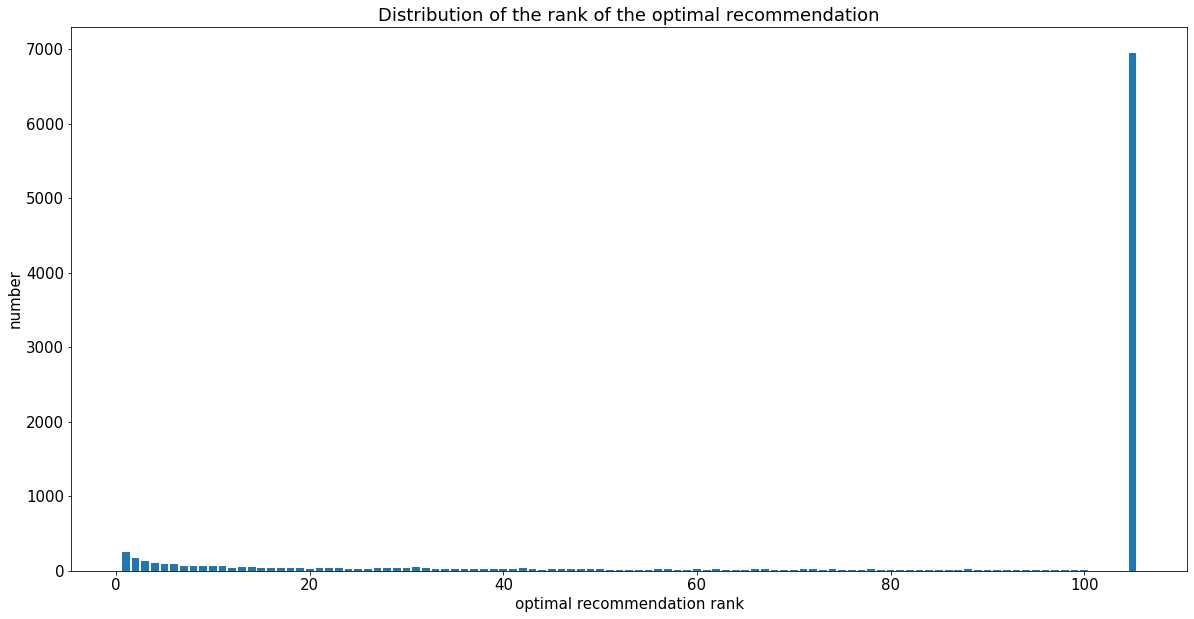

In [9]:
page_rank.show_distrib_rank()

Similarly to Page Rank, we notice that, our result of 0.054 is not due to an overall good prediction but to a good prediction for a subset of the sessions ! In Particular, more than 68% of the sessions have very bad predictions (optimal prediction is not in the top 100) !!!

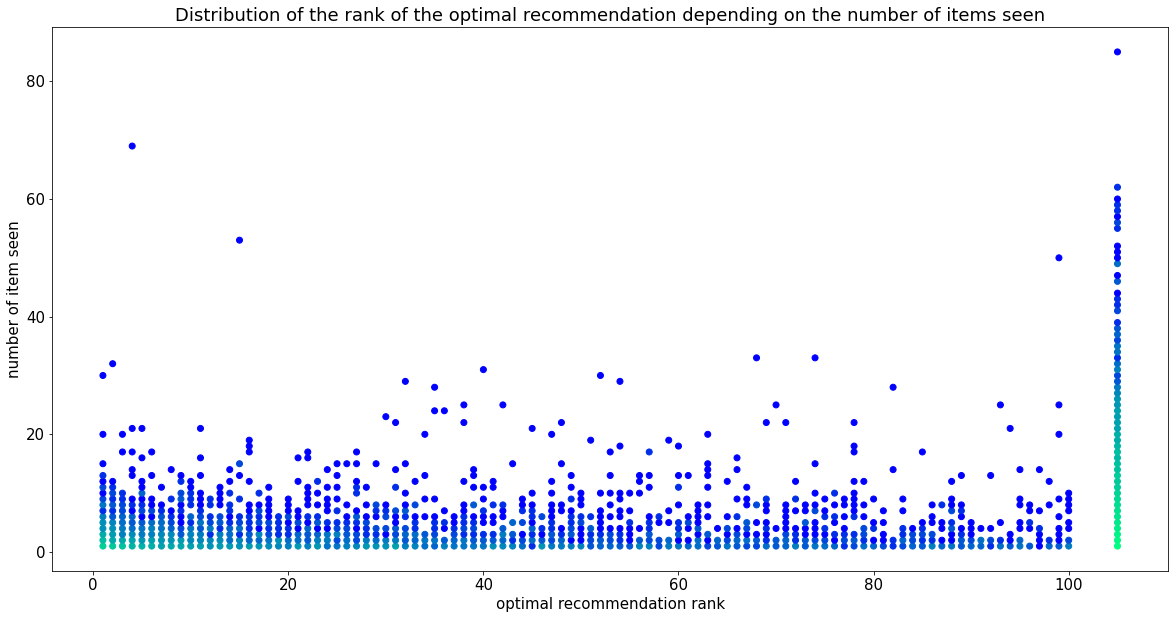

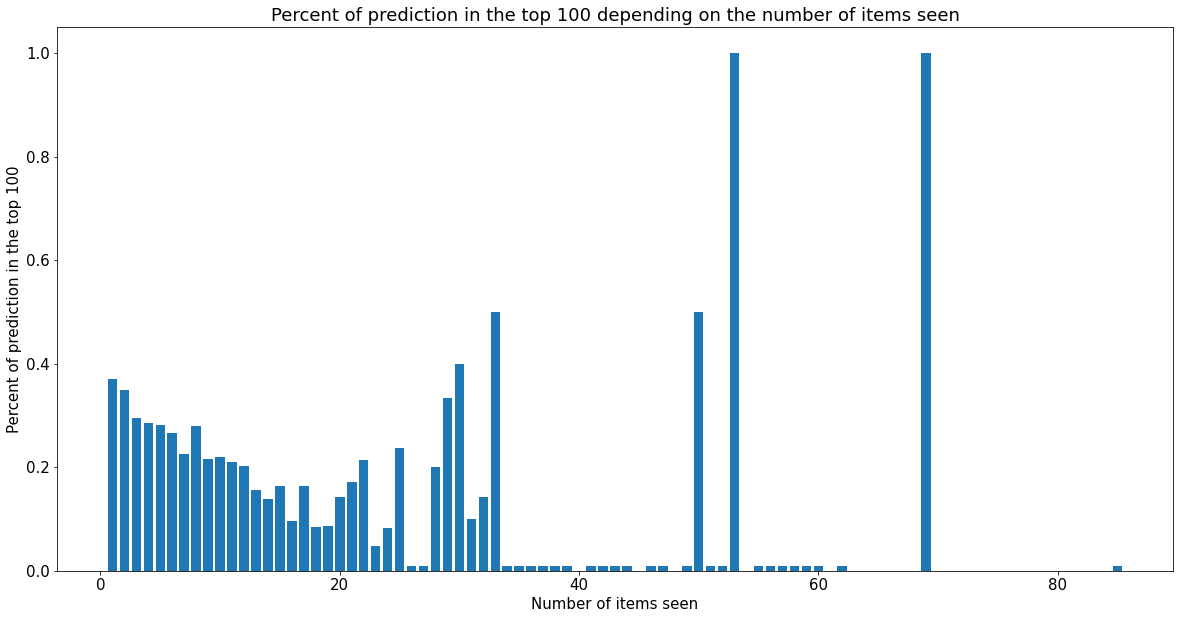

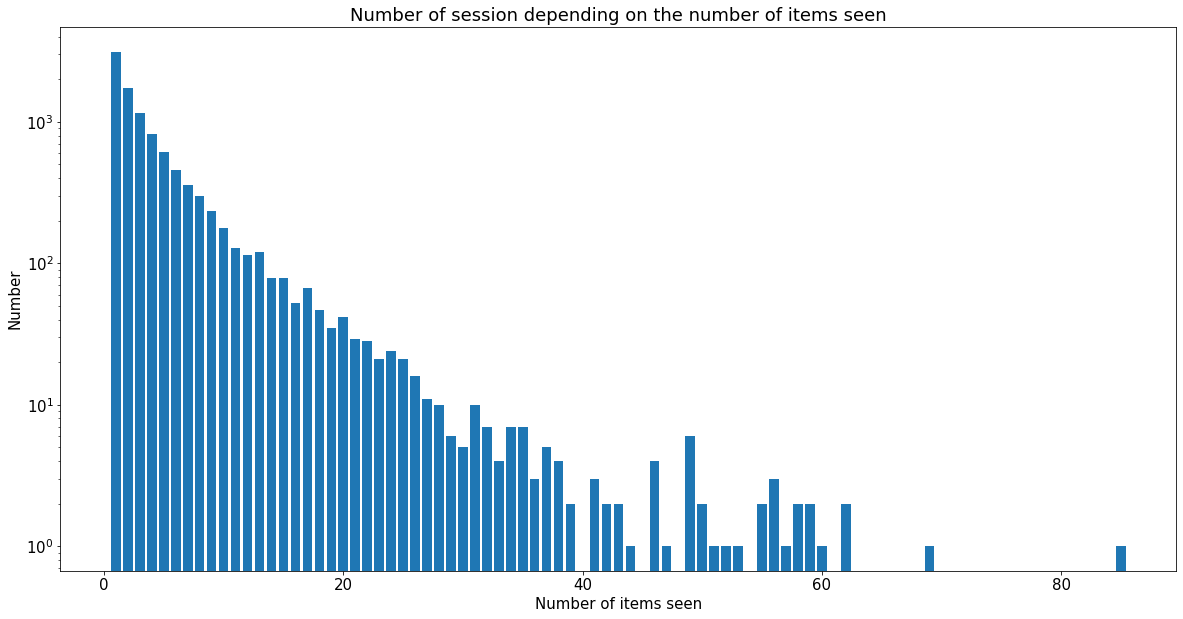

In [10]:
page_rank.show_stat_bad_sessions(data.test_sessions)

We can see that our alghoritm is not horrible when we have few seen items in the seesion ! Although, our result are not excelent when we have more seen items within the session.

## Create result for leaderboard

This final section is used to create the csv file containing the predictions for the leaderboard datas.

In [11]:
page_rank = PageRank(data.list_candidate_items)

In [12]:
page_rank.create_similar_matrix(data.df_item_features)

In [13]:
page_rank.process_page_rank(data.df_test_leaderboard_sessions, n_iter=1, save=True)

array created
1 iterations done
.........................................add session [0:4096]
array created
1 iterations done
.........................................add session [4096:8192]
array created
1 iterations done
.........................................add session [8192:12288]
array created
1 iterations done
.........................................add session [12288:16384]
array created
1 iterations done
.........................................add session [16384:20480]
array created
1 iterations done
.........................................add session [20480:24576]
array created
1 iterations done
.........................................add session [24576:28672]
array created
1 iterations done
.........................................add session [28672:32768]
array created
1 iterations done
.........................................add session [32768:36864]
array created
1 iterations done
.........................................add session [36864:40960]
array created
1 it